# Gradient Descent

Gradient descent is a popular optimization algorithm used in machine learning and deep learning to find the minimum value of a function. The algorithm works by iteratively adjusting the parameters of the function in the direction of steepest descent, or negative gradient, until the minimum value is reached. 

In this notebook, we have applied this algorithm in linear regression, in manual code part, we make application on simulation data, in scikit-learn
 part, we apply it on diabetes dataset.

## Linear Regression using Gradient Descent manually

In this part, we manually code for linear regression and apply it on the simple dataset, we also make analysis for this model.

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
class LinearRegression:
    def __init__(self, lr=0.01, n_iters=100):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.loss_history = []
        
    def fit(self, X, y):
        # Initialize weights and bias to zero
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent
        for i in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            # Calculate and store the mean squared error
            mse = np.mean((y_predicted - y)**2)
            self.loss_history.append(mse)
            
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted


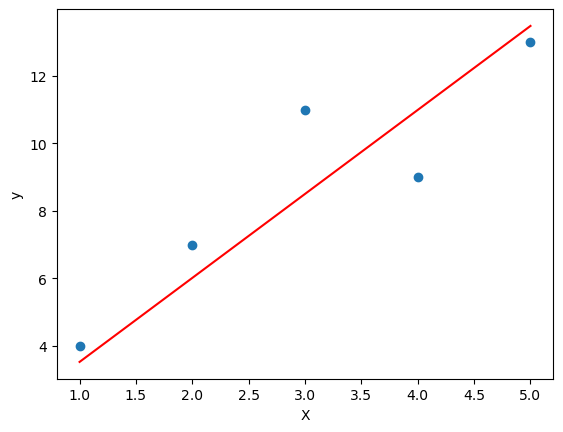

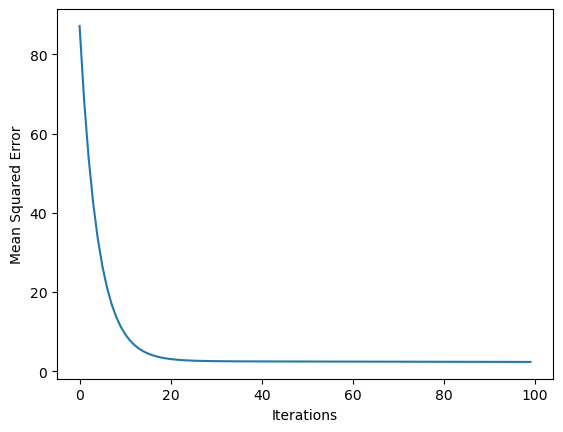

In [29]:
X = np.array([1, 2, 3, 4, 5])
y = np.array([4, 7, 11, 9, 13])

# Train the model
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)

# Make predictions
y_pred = lr.predict(X.reshape(-1, 1))

# Plot the results
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Plot the loss history
plt.plot(lr.loss_history)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()


According to the plot, we could see the model has a good performance, the MSE decreases with iteration increasing.

In [30]:
# Calculate evaluation metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

# Print the results
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Absolute Error: 1.28
Mean Squared Error: 2.32
Root Mean Squared Error: 1.52
R2 Score: 0.76


For the MSE, it is just 2.32 and for $R^2$ is 0.76, both numbers satisfy our expectation.

In [31]:
class LinearRegression:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.loss_history = []
        
    def fit(self, X, y):
        # Initialize weights and bias to zero
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent
        for i in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            # Calculate and store the mean squared error
            mse = np.mean((y_predicted - y)**2)
            self.loss_history.append(mse)
            
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted


In the former part, we set iteration time as 100 times, then we change this number to 1000 times to see model's performance.

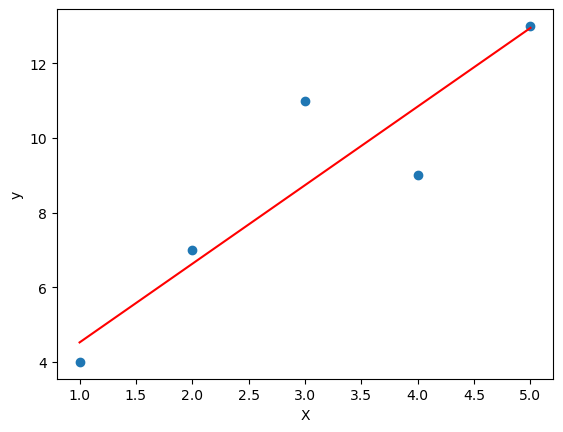

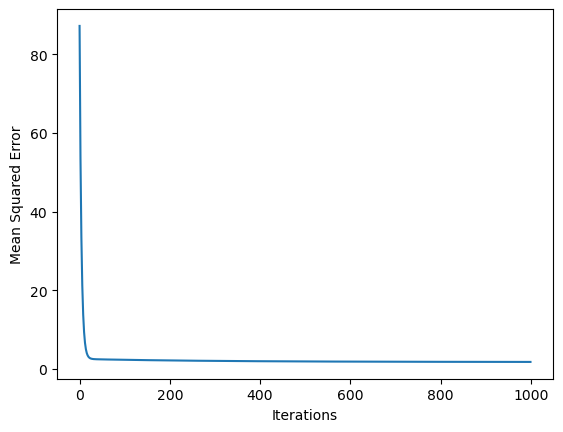

In [32]:
X = np.array([1, 2, 3, 4, 5])
y = np.array([4, 7, 11, 9, 13])

# Train the model
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)

# Make predictions
y_pred = lr.predict(X.reshape(-1, 1))

# Plot the results
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Plot the loss history
plt.plot(lr.loss_history)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()


According to the plot, we could see when iteration time is bigger than 100, there does not exist significant decrease in MSE.

In [33]:
# Calculate evaluation metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

# Print the results
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Absolute Error: 1.01
Mean Squared Error: 1.79
Root Mean Squared Error: 1.34
R2 Score: 0.82


The MSE is 1.79 and the $R^2$ is 0.82, when we increase iteration times, the performance of the model improves slightly. This is because the dataset is small and there exists clear linear relationship between variables.

## Scikit-learn and Application on Diabetes Dataset

In this part, we directly apply gradient descent via scikit-learn and apply it on the diabetes dataset.

In [5]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
diabetes = load_diabetes()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SGDRegressor model with gradient descent optimization
lr = SGDRegressor(loss='squared_error', penalty=None, max_iter=1000, learning_rate='constant', eta0=0.01)

# Train the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 3168.140194748303
